In [1]:
from neuron import h, gui
import plotly
import matplotlib.pyplot as plt
import numpy as np
# import seaborn as sns
import pickle
import plotly
from scipy.optimize import leastsq
plt.rcParams['font.size']=15
from tqdm import *

--No graphics will be displayed.


In [2]:
!nrnivmodl

/home/mjy/anaconda3/envs/bilinear_network/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
/home/mjy/project/bilinear_network/ganglion
Mod files: "./capump.mod" "./spike.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.so
Successfully created x86_64/special


In [3]:
h.load_file('mosinit.hoc')

	1 
	1 
	1 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	1 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
	0 
	0 
	0 
	0 
	1 
loading: SmallSimple/CTT1209B/ctt1209b
	1 


1.0

In [4]:
for sec in h.allsec():
    sec.gnabar_spike = 0.05
    sec.gkbar_spike = 0.018
# h.soma.gnabar_spike = 0.05
# h.soma.gkbar_spike = 0.018

In [5]:
h.soma.gnabar_spike, h.soma.gkbar_spike

(0.05, 0.018)

In [6]:
def change_to_pas():
    for sec in h.allsec():
        #if sec != h.soma:
            sec.gnabar_spike = 0
            sec.gkbar_spike = 0
            sec.gcabar_spike = 0
            sec.gabar_spike = 0
            sec.gkcbar_spike = 0
# change_to_pas()

In [7]:
for sec in h.allsec():
    if sec != h.soma:
        sec.Ra = 500
        sec.cm = 0.5

In [8]:
modi_dend = [h.dend1[0], h.dend1[1], h.dend1[4], h.dend2[0], h.dend2[1], h.dend2[4]]
for sec in modi_dend:
    sec.L *= 4

In [9]:
input_list = [h.dend1[2], h.dend1[3], h.dend1[5], h.dend1[6], h.dend2[2], h.dend2[3], h.dend2[6], h.dend2[7], h.dend2[8]]
#input_list = [h.dend1[2], h.dend1[3], h.dend1[1], h.dend1[0], h.dend2[6], h.dend2[7], h.dend2[5], h.dend2[4], h.dend2[0]]
# input_list2 = [h.dend1[2], h.dend1[3], h.dend1[5], h.dend1[6], h.dend2[2]]

In [10]:
ic = h.IClamp[0]
ic.amp = 0

ns0 = h.NetStim()
ns1 = h.NetStim()
ns2 = h.NetStim()
ns3 = h.NetStim()
ns4 = h.NetStim()
ns5 = h.NetStim()
ns6 = h.NetStim()
ns7 = h.NetStim()
ns8 = h.NetStim()

#exi
syn0 = h.ExpSyn(input_list[0](1))
syn1 = h.ExpSyn(input_list[1](1))
syn2 = h.ExpSyn(input_list[2](1))
syn3 = h.ExpSyn(input_list[3](1))
syn4 = h.ExpSyn(input_list[4](1))
syn5 = h.ExpSyn(input_list[5](1))
syn6 = h.ExpSyn(input_list[6](1))
syn7 = h.ExpSyn(input_list[7](1))
syn8 = h.ExpSyn(input_list[8](1))

# syn0 = h.ExpSyn(h.dend2[6](1))
# syn1 = h.ExpSyn(h.dend2[7](1))
# syn2 = h.ExpSyn(h.dend2[6](0.5))
# syn3 = h.ExpSyn(h.dend2[7](0.5))
# syn4 = h.ExpSyn(h.dend2[5](1))
# syn5 = h.ExpSyn(h.dend2[5](0.5))
# syn6 = h.ExpSyn(h.dend2[4](1))
# syn7 = h.ExpSyn(h.dend2[4](0.5))
# syn8 = h.ExpSyn(h.dend2[0](1))

nc0 = h.NetCon(ns0, syn0)
nc1 = h.NetCon(ns1, syn1)
nc2 = h.NetCon(ns2, syn2)
nc3 = h.NetCon(ns3, syn3)
nc4 = h.NetCon(ns4, syn4)
nc5 = h.NetCon(ns5, syn5)
nc6 = h.NetCon(ns6, syn6)
nc7 = h.NetCon(ns7, syn7)
nc8 = h.NetCon(ns8, syn8)

In [11]:
ns_list = [ns0, ns1, ns2, ns3, ns4, ns5, ns6, ns7, ns8]
syn_list = [syn0, syn1, syn2, syn3, syn4, syn5, syn6, syn7, syn8]
syne_list = [syn0, syn2, syn4, syn6, syn8]
syni_list = [syn1, syn3, syn5, syn7]
nc_list = [nc0, nc1, nc2, nc3, nc4, nc5, nc6, nc7, nc8]
nce_list = [nc0, nc2, nc4, nc6, nc8]
nci_list = [nc1, nc3, nc5, nc7]
branch_points = [h.dend1[1], h.dend1[0], h.dend1[4], h.dend2[1], h.dend2[0], h.dend2[4], h.dend2[5]]

In [12]:
for i in range(len(input_list)):
#if i == 0 or i == 1:
    ns_list[i].start = 0
    ns_list[i].number = 1000
    ns_list[i].interval = 100
    ns_list[i].noise = 1
    nc_list[i].delay = 0

In [17]:
idx = 0
for i in range(len(input_list)):
    syn_list[i].e = 0
    syn_list[i].tau = 7
    nc_list[i].weight[0] = 0.0004
    # if i == idx:
    #     nc_list[i].weight[0] = 0.0003
    # else:
    #     nc_list[i].weight[0] = 0.0003
t = h.Vector().record(h._ref_t)
v = h.Vector().record(h.soma(0.5)._ref_v)
h.finitialize(-66.3)
h.continuerun(5000)

0.0

Text(0, 0.5, 'membrane potential (mV)')

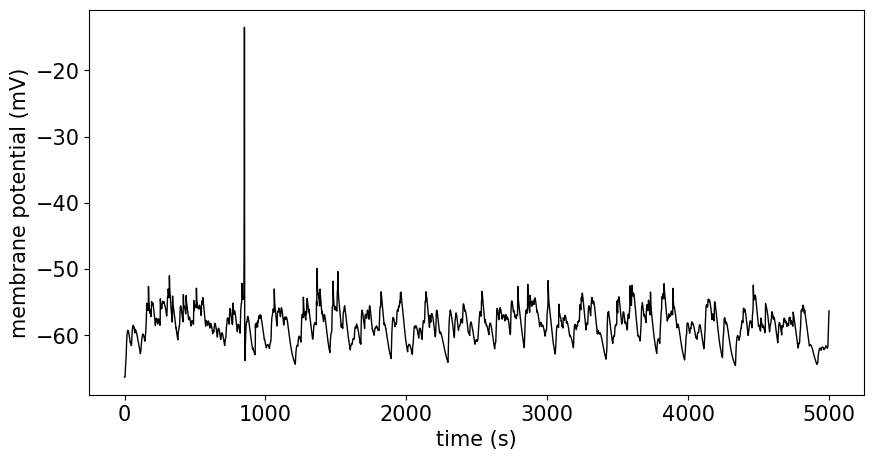

In [18]:
tnp = np.array(t)
vnp = np.array(v)
plt.figure(figsize=(10, 5))
plt.plot(tnp, vnp, lw = 1, c='black')
# plt.plot(t, vsc, lw = 10, c='blue')
plt.xlabel('time (s)')
plt.ylabel('membrane potential (mV)')
# plt.ylim(-0.5, 0.4)
# plt.axis('off')

In [21]:
# -----------------------------
# 参数
# -----------------------------
num_trials = 5
time_dur = 5000.0  # ms
downsample = 10    # v[::downsample]
v_init = -66.3

# ip 栅格长度（1ms 采样：0..time_dur 含端点）
time_ip = int(time_dur) + 1  
# 输入通道数（与 nc_list 长度一致）
n_inputs = len(nc_list)

def vec_to_np(vec):
    """安全地把 hoc Vector 转成 numpy float 数组。"""
    if hasattr(vec, "as_numpy"):
        return np.array(vec.as_numpy(), dtype=float, copy=True)
    elif hasattr(vec, "to_python"):
        return np.array(vec.to_python(), dtype=float)
    else:
        return np.array([vec.x[i] for i in range(int(vec.size()))], dtype=float)

# -----------------------------
# 统一参数设置
# -----------------------------
for ns in ns_list:
    ns.start = 0
    ns.number = 2000
    ns.interval = 40
    ns.noise = 1

for nc in nc_list:
    nc.delay = 0
    nc.weight[0] = 0.0004

for syn in syn_list:
    syn.tau = 7
    syn.e = 0

# -----------------------------
# 运行并记录
# -----------------------------
# ip: (num_trials, n_inputs, time_ip) -> 0/1 二值栅格
ip_raster = np.zeros((num_trials, n_inputs, time_ip), dtype=np.uint8)
op_list = []          # 暂存每个 trial 的膜电位下采样
spike_time_all = []   # 普通 Python list，保存每个 trial 的尖峰时间（变长）

for i in tqdm(range(num_trials)):
    # 记录膜电位
    v_vec = h.Vector().record(h.soma(0.5)._ref_v)

    # 记录 soma 脉冲发放时间
    spike_vec = h.Vector()
    netcon = h.NetCon(h.soma(0.5)._ref_v, None)
    # 可选：设阈值，如需要可开启
    netcon.threshold = -40
    netcon.record(spike_vec)

    # 记录每个输入通道的事件时间
    input_event_vecs = []
    for nc in nc_list:
        tv = h.Vector()
        nc.record(tv)
        input_event_vecs.append(tv)

    # 初始化并运行
    h.finitialize(v_init)
    h.continuerun(time_dur)

    # ---- ip：把事件时间投到 1ms 栅格 ----
    for ch, tv in enumerate(input_event_vecs):
        et = vec_to_np(tv)                # 事件时间（ms, float）
        et = np.round(et).astype(int)     # 四舍五入到 1ms
        # 只保留落在 0..time_dur 的事件
        et = et[(et >= 0) & (et <= int(time_dur))]
        if et.size > 0:
            # 多个事件落在同一ms -> 仍然置1（如需计数可改为 +=1 再裁剪）
            ip_raster[i, ch, et] = 1

    # ---- op：膜电位下采样后保存 ----
    v_np = vec_to_np(v_vec)
    op_list.append(v_np[::downsample])

    # ---- spike_time：保存为 list（变长）----
    st = np.round(vec_to_np(spike_vec), 0).tolist()
    spike_time_all.append(st)

    print(f"Trial {i+1}/{num_trials} done")

# 将 op_list 规整成二维 array: (num_trials, time_op)
# 注意：若极端情况下各 trial 的 v_vec 长度不同且 ::downsample 后不一致，可以改为插值到统一长度。
op = np.vstack(op_list)

# -----------------------------
# 保存为 .npz
# -----------------------------
save_path = "/home/mjy/project/bilinear_network/data/data_5s_active_150Hz.npz"
np.savez_compressed(
    save_path,
    ip=ip_raster,             # (num_trials, n_inputs, time_ip)
    op=op,                    # (num_trials, time_op)
    spike_time=np.array(spike_time_all, dtype=object) # Python list（变长）
)

print("---------------")
print(f"Saved to: {save_path}")


 20%|██        | 1/5 [00:05<00:22,  5.62s/it]

Trial 1/5 done


 40%|████      | 2/5 [00:11<00:16,  5.63s/it]

Trial 2/5 done


 60%|██████    | 3/5 [00:16<00:11,  5.62s/it]

Trial 3/5 done


 80%|████████  | 4/5 [00:22<00:05,  5.63s/it]

Trial 4/5 done


100%|██████████| 5/5 [00:28<00:00,  5.63s/it]

Trial 5/5 done
---------------
Saved to: /home/mjy/project/bilinear_network/data/data_5s_active_150Hz.npz


In [86]:
op.shape, ip_raster.shape

((2, 5001), (2, 9, 5001))

In [104]:
spike_time_all

[[1227.0], [], [1928.0], [1502.0], [2157.0]]

In [105]:
spike_time_all[4]

[2157.0]

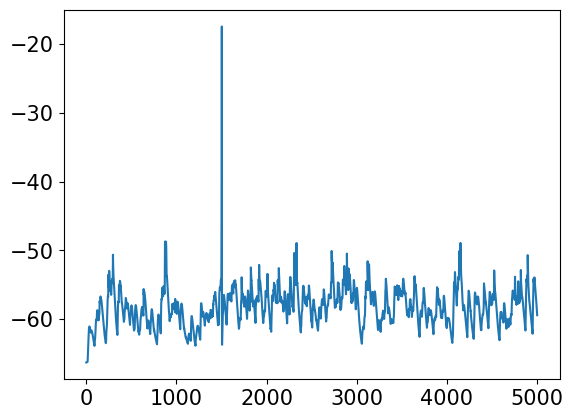

In [110]:
plt.plot(op[3])

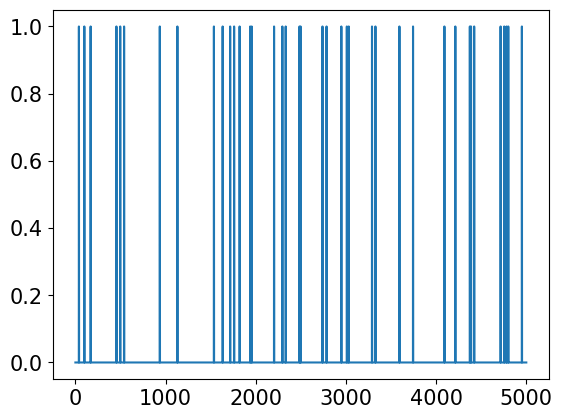

In [92]:
plt.plot(ip_raster[0, 0])

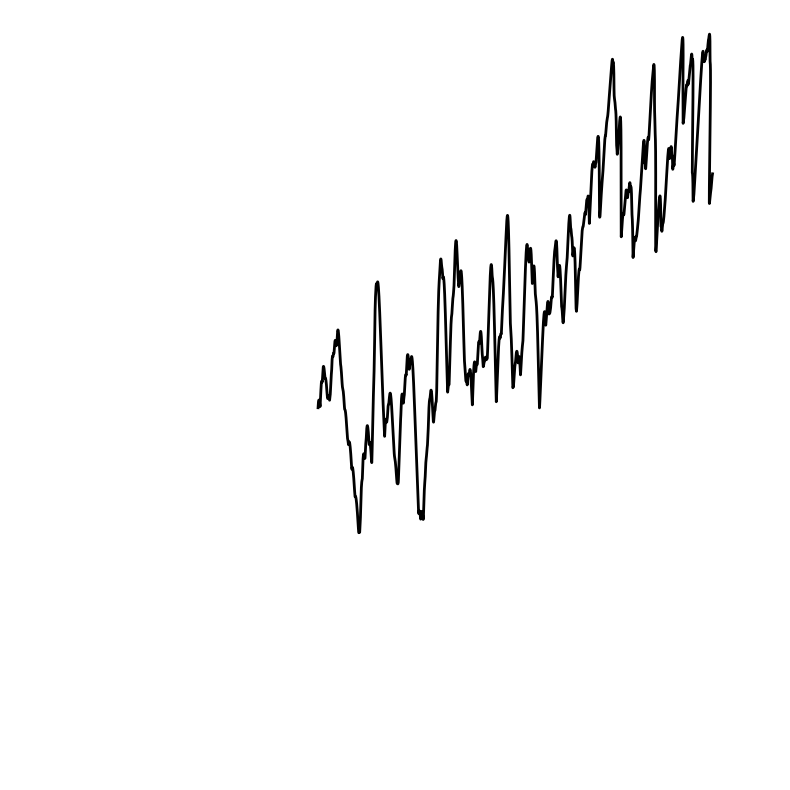

In [29]:
from mpl_toolkits.mplot3d import Axes3D

tnp = np.array(t)
vnp = np.array(v)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the curve on the yz plane by setting x coordinate to a constant
ax.plot3D(np.zeros_like(tnp[2000:])-0.04, tnp[2000:], vnp[2000:], lw=2, c='black')

# Hide the axes
ax.axis('off')

# Hide the background
ax.set_frame_on(False)

# Change the aspect ratio of the y axis
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 2, 1, 1]))
plt.savefig('figure/trace_3d.png', dpi=800, bbox_inches='tight')

In [60]:
vsc = np.array(v)

In [36]:
ve = np.array(v)

In [48]:
vi = np.array(v)

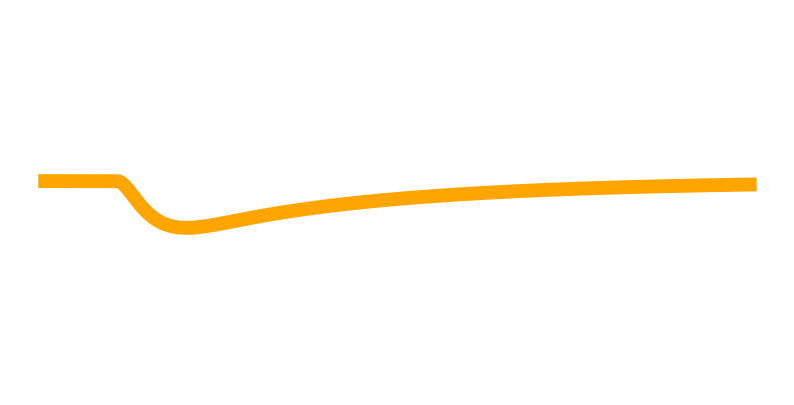

In [79]:
plt.figure(figsize=(10, 5))
plt.plot(t, vsc-ve, lw = 10, c='orange')
# plt.plot(t, vsc, lw = 10, c='blue')
plt.xlabel('time (s)')
plt.ylabel('membrane potential (mV)')
plt.ylim(-0.5, 0.4)
plt.axis('off')

plt.savefig('figure/trace_new_sc.png', dpi=800, bbox_inches='tight')

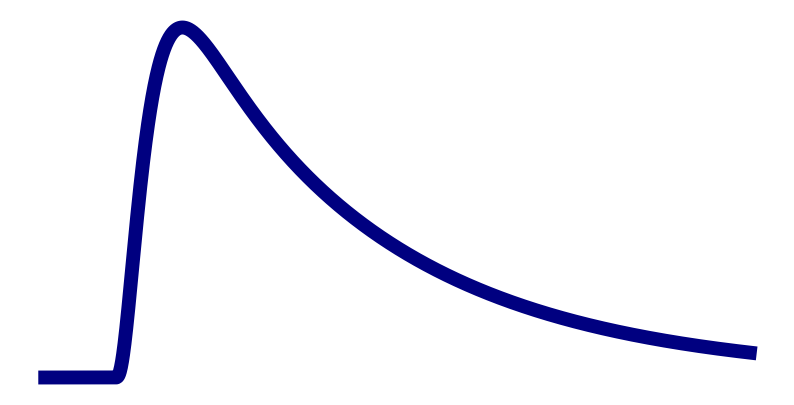

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(t, ve, lw = 10, c='navy')
plt.xlabel('time (s)')
plt.ylabel('membrane potential (mV)')
# plt.ylim(-70, -45)
plt.axis('off')

plt.savefig('figure/trace_new.png', dpi=800, bbox_inches='tight')

In [26]:
vnp = np.array(v)
vnp[np.where(vnp > -20)] = 0

(-10.000000000000561, 210.0000000000118, -70.0, -45.0)

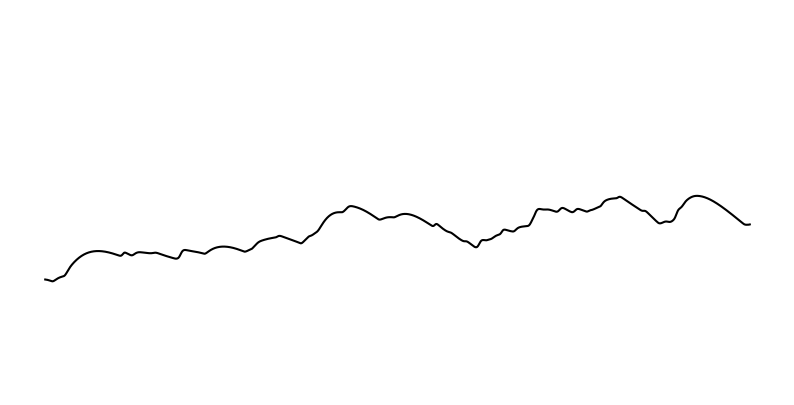

In [15]:
tnp = np.linspace(0, 6, len(v))
plt.figure(figsize=(10, 5))
plt.plot(t, v, c='black')
plt.xlabel('time (s)')
plt.ylabel('membrane potential (mV)')
plt.ylim(-70, -45)
plt.axis('off')

# plt.savefig('figure/trace.png', dpi=800, bbox_inches='tight')

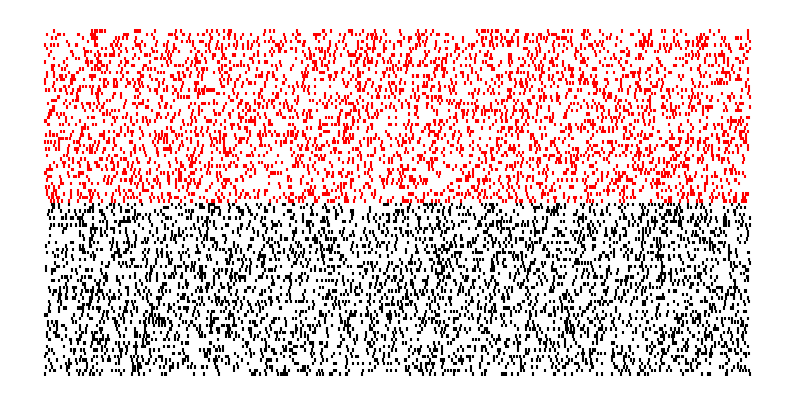

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a 100-dimensional Poisson sequence of length 1000
np.random.seed(0)  # For reproducibility
lambd = 0.1  # Rate parameter for the Poisson distribution
data = np.random.poisson(lambd, size=(100, 1000))
spike_times = [np.where(data[i] > 0)[0] for i in range(100)]
# Create a raster plot

spike_times_red = [[] for _ in range(50)] + [spike_times[i] for i in range(50)]
# Last 50 neurons in black, positioned at the bottom
spike_times_black = spike_times[50:]  # Second half

# Create a raster plot using eventplot
plt.figure(figsize=(10, 5))
plt.eventplot(spike_times_red, orientation='horizontal', colors='red')
plt.eventplot(spike_times_black, orientation='horizontal', colors='black')

# Hide the axes and ticks
plt.axis('off')

plt.savefig('figure/input_spike_train.png', dpi=800, bbox_inches='tight')

In [ ]:
num = 2
time_dur = 4000
tr_5_ip = []
tr_5_spike_time = []
tr_5_op = np.empty((num, time_dur + 1))

for j in range(len(input_list)):
    ns_list[j].start = 0
    ns_list[j].number = 160
    ns_list[j].interval = 50
    ns_list[j].noise = 1
    nc_list[j].delay = 000
for j in range(len(input_list)):
    syn_list[j].tau = 7
    syn_list[j].e = 0
    nc_list[j].weight[0] = 0.0005

for i in range(num):
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(h.soma(0.5)._ref_v)
    spike_vec = h.Vector()
    netcon = h.NetCon(h.soma(0.5)._ref_v, None)
    netcon.record(spike_vec)
    tvec0 = h.Vector()
    tvec1 = h.Vector()
    tvec2 = h.Vector()
    tvec3 = h.Vector()
    tvec4 = h.Vector()
    tvec5 = h.Vector()
    tvec6 = h.Vector()
    tvec7 = h.Vector()
    tvec8 = h.Vector()
    nc0.record(tvec0)
    nc1.record(tvec1)
    nc2.record(tvec2)
    nc3.record(tvec3)
    nc4.record(tvec4)
    nc5.record(tvec5)
    nc6.record(tvec6)
    nc7.record(tvec7)
    nc8.record(tvec8)
    h.finitialize(-67.26)
    h.continuerun(time_dur)
    tr_5_ip.append(np.round(np.array(tvec0), decimals=0))
    tr_5_ip.append(np.round(np.array(tvec1), decimals=0))
    tr_5_ip.append(np.round(np.array(tvec2), decimals=0))
    tr_5_ip.append(np.round(np.array(tvec3), decimals=0))
    tr_5_ip.append(np.round(np.array(tvec4), decimals=0))
    tr_5_ip.append(np.round(np.array(tvec5), decimals=0))
    tr_5_ip.append(np.round(np.array(tvec6), decimals=0))
    tr_5_ip.append(np.round(np.array(tvec7), decimals=0))
    tr_5_ip.append(np.round(np.array(tvec8), decimals=0))
    # tr_5_spike_time.append(np.round(np.array(spike_vec), decimals=0))
    tr_5_op[i] = np.array(v)[::10]
    # if i % 10 == 0:
    print(i)

print('---------------')
print('5s end')
with open('/home/mjy/project/bilinear_network/data/training_set_ip_5s_active.p', 'wb') as f:
    pickle.dump(tr_5_ip, f)
with open('/home/mjy/project/bilinear_network/data/training_set_op_5s_active.p', 'wb') as f:
    pickle.dump(tr_5_op, f)


0
1
---------------
5s end
0
1
---------------
10s end


In [17]:
num = 2
time_dur = 8000
tr_5_ip = []
# tr_5_spike_time = []
tr_5_op = np.empty((num, time_dur + 1))

for j in range(len(input_list)):
    ns_list[j].start = 0
    ns_list[j].number = 160 * 2
    ns_list[j].interval = 50
    ns_list[j].noise = 1
    nc_list[j].delay = 000
for j in range(len(input_list)):
    syn_list[j].tau = 7
    syn_list[j].e = 0
    nc_list[j].weight[0] = 0.0005

for i in range(num):
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(h.soma(0.5)._ref_v)
    # spike_vec = h.Vector()
    # netcon = h.NetCon(h.soma(0.5)._ref_v, None)
    # netcon.record(spike_vec)
    tvec0 = h.Vector()
    tvec1 = h.Vector()
    tvec2 = h.Vector()
    tvec3 = h.Vector()
    tvec4 = h.Vector()
    tvec5 = h.Vector()
    tvec6 = h.Vector()
    tvec7 = h.Vector()
    tvec8 = h.Vector()
    nc0.record(tvec0)
    nc1.record(tvec1)
    nc2.record(tvec2)
    nc3.record(tvec3)
    nc4.record(tvec4)
    nc5.record(tvec5)
    nc6.record(tvec6)
    nc7.record(tvec7)
    nc8.record(tvec8)
    h.finitialize(-67.26)
    h.continuerun(time_dur)
    tr_5_ip.append(np.round(np.array(tvec0), decimals=0))
    tr_5_ip.append(np.round(np.array(tvec1), decimals=0))
    tr_5_ip.append(np.round(np.array(tvec2), decimals=0))
    tr_5_ip.append(np.round(np.array(tvec3), decimals=0))
    tr_5_ip.append(np.round(np.array(tvec4), decimals=0))
    tr_5_ip.append(np.round(np.array(tvec5), decimals=0))
    tr_5_ip.append(np.round(np.array(tvec6), decimals=0))
    tr_5_ip.append(np.round(np.array(tvec7), decimals=0))
    tr_5_ip.append(np.round(np.array(tvec8), decimals=0))
    # tr_5_spike_time.append(np.round(np.array(spike_vec), decimals=0))
    tr_5_op[i] = np.array(v)[::10]
    # if i % 10 == 0:
    print(i)

print('---------------')
print('5s end')
with open('/home/mjy/project/bilinear_network/data/training_set_ip_8s_active.p', 'wb') as f:
    pickle.dump(tr_5_ip, f)
with open('/home/mjy/project/bilinear_network/data/training_set_op_8s_active.p', 'wb') as f:
    pickle.dump(tr_5_op, f)

0
1
---------------
5s end


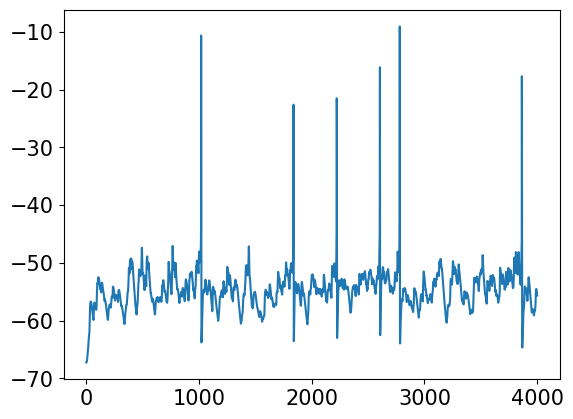

In [15]:
plt.plot(tr_5_op[0])

In [ ]:
plt.plot(tr_10_op[0])

In [62]:
PSPs = np.empty((1278, 400))
for j in range(1278):
    if j % 10 == 0:
        print(j)
    if j < 639:
        idx = np.random.randint(0, len(input_list))
        for i in range(len(input_list)):
            syn_list[i].e = 0
            syn_list[i].tau = np.random.uniform(5, 10)
            if i == idx:
                nc_list[i].weight[0] = 0.00002 * np.random.randint(2, 5)
            else:
                nc_list[i].weight[0] = 0.0000001 * np.random.randint(2, 5)
        t = h.Vector().record(h._ref_t)
        v = h.Vector().record(h.soma(0.5)._ref_v)
        h.finitialize(-62.5)
        h.continuerun(400)
        v9 = np.array(v)[::10]
        PSPs[j] = v9[:400]
    else:
        idx = np.random.randint(0, len(input_list))
        for i in range(len(input_list)):
            syn_list[i].e = -100
            syn_list[i].tau = np.random.uniform(5, 10)
            if i == idx:
                nc_list[i].weight[0] = 0.00002 * np.random.randint(2, 5)
            else:
                nc_list[i].weight[0] = 0.0000001 * np.random.randint(2, 5)
        t = h.Vector().record(h._ref_t)
        v = h.Vector().record(h.soma(0.5)._ref_v)
        h.finitialize(-62.5)
        h.continuerun(400)
        v9 = np.array(v)[::10]
        PSPs[j] = v9[:400]

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270


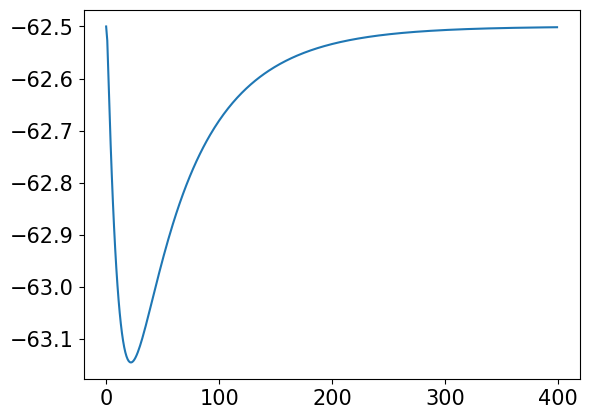

In [65]:
plt.plot(PSPs[-15])

In [ ]:
with open('/home/mjy/project/bilinear_network/data/PSPs.p', 'wb') as f:
    pickle.dump(PSPs, f)

In [60]:
# E
idx = np.random.randint(0, len(input_list))
for i in range(len(input_list)):
    syn_list[i].e = 0
    syn_list[i].tau = np.random.uniform(5, 9)
    if i == idx:
        nc_list[i].weight[0] = 0.00002 * np.random.randint(2, 5)
    else:
        nc_list[i].weight[0] = 0.00000

Text(0, 0.5, 'MP(mV)')

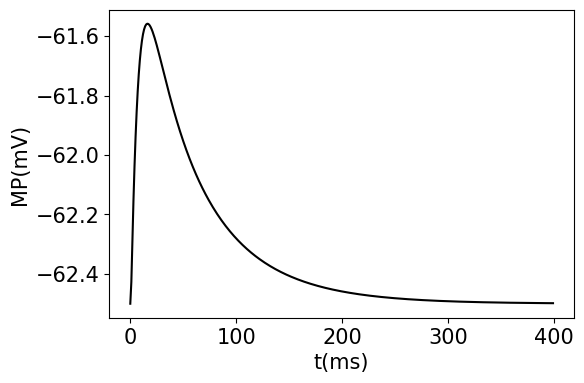

In [61]:
t = h.Vector().record(h._ref_t)
v = h.Vector().record(h.soma(0.5)._ref_v)
v2 = h.Vector().record(h.dend1[4](0.5)._ref_v)
ina = h.Vector().record(h.soma(0.5)._ref_ina)
ik = h.Vector().record(h.soma(0.5)._ref_ik)
ica = h.Vector().record(h.soma(0.5)._ref_ica)
vec = h.Vector()
netcon = h.NetCon(h.soma(0.5)._ref_v, None)
netcon.record(vec)
tvec0 = h.Vector()
nc1.record(tvec0)
h.finitialize(-62.5)
h.continuerun(400)
v9 = np.array(v)[::10]
plt.figure(figsize=(6,4))
plt.plot(v9[:400], c='black')
plt.xlabel('t(ms)')
plt.ylabel('MP(mV)')
#plt.axhline(y=-50, ls='--', c='r')
#plt.savefig('figure/suprathreshold_trace',bbox_inches='tight')
#plt.plot(t, v2, label='dend')
#plt.legend()

In [32]:
with open('/home/mjy/project/bilinear_network/data/single_EPSP.p', 'wb') as f:
    pickle.dump(v9, f)

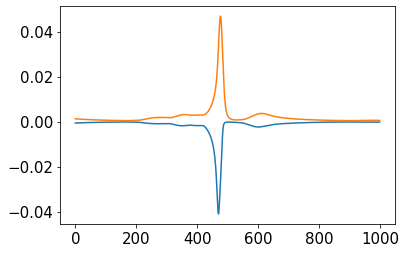

In [212]:
plt.plot(np.array(ina)[4200:5200])
plt.plot(np.array(ik)[4200:5200])

In [221]:
ik_np[420]

0.002884792775968604

In [218]:
ina_np[np.where(ina_np > -0.001802293082092216)] = -0.001802293082092216

In [222]:
ik_np[np.where(ik_np < 0.002884792775968604)] = 0.002884792775968604

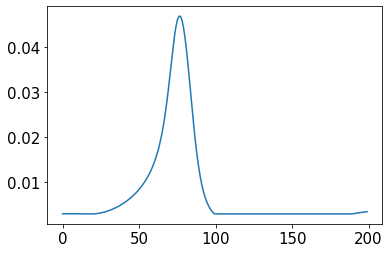

In [223]:
plt.plot(ik_np[400:600])

In [213]:
ina_np = np.array(ina)[4200:5200]
ik_np = np.array(ik)[4200:5200]

In [188]:
ina_np[50:360] = -0.0005
ik_np[50:360] = -0.0008

In [70]:
v_np = np.array(v)

In [72]:
np.argmax(v_np[:10000])

8751

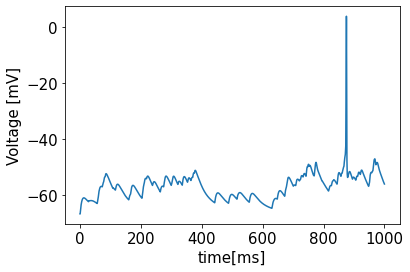

In [139]:
t = np.linspace(0, 1000, 10000)
plt.plot(t, v_np[:10000])
plt.xlabel('time[ms]')
plt.ylabel('Voltage [mV]')
plt.savefig('figure/my_tune_trace', bbox_inches='tight')

In [204]:
ina_np[361] = -0.001
ik_np[361] = 0.0008

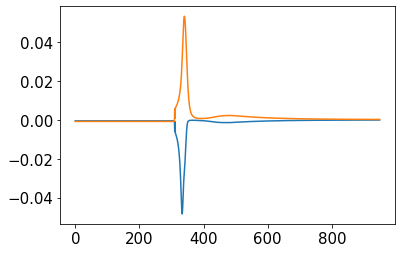

In [205]:
plt.plot(ina_np[50:])
plt.plot(ik_np[50:])

In [164]:
len(np.array(ik))

10001

In [162]:
np.min(np.array(ik)[16400:16900]*10)

ValueError: zero-size array to reduction operation minimum which has no identity

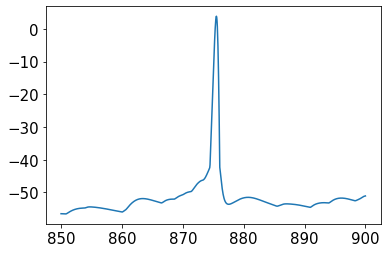

In [166]:
plt.plot(t, v_np[8241:9241])

In [228]:
np.min(ik_np * 10)

0.028847927759686042

In [232]:
ik_np[28*20:] = 0.028847927759686042/10
ina_np[28*20:] = -0.01802293082092216/10

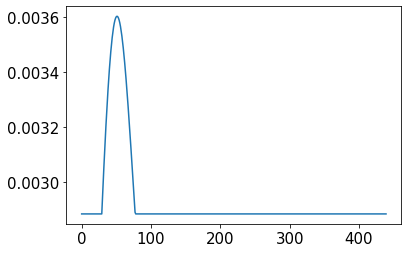

In [231]:
plt.plot(ik_np[28*20:])

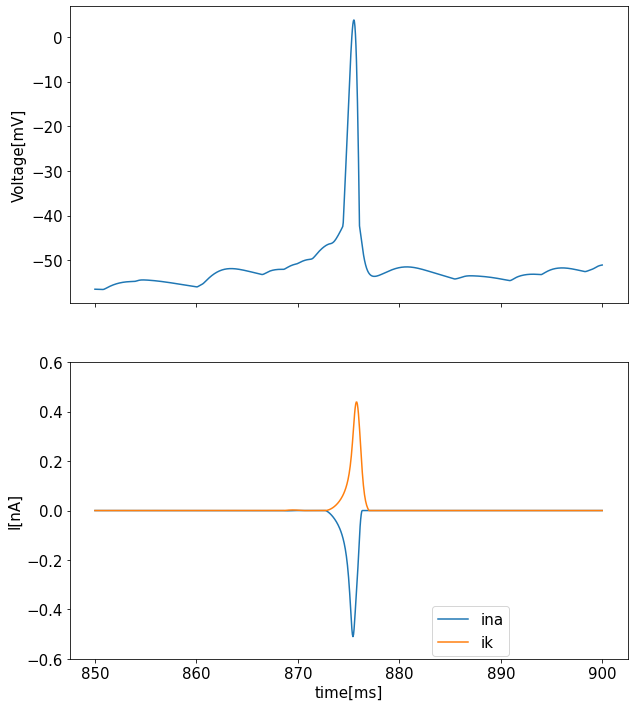

In [240]:
idx = 0
t = np.linspace(850, 900, 1000)
t2 = np.linspace(850, 900, 925)
fig, axs = plt.subplots(2,figsize=(10,12),sharex=True)
axs[0].plot(t, v_np[8241:9241])
axs[0].set_ylabel('Voltage[mV]')
#axs[0].legend(loc=(0.65,0.01))
axs[1].plot(t2, ina_np[:925] * 13+0.01802293082092216/10*13, label='ina')
axs[1].plot(t2, ik_np[:925] * 10-0.028847927759686042, label='ik')
axs[1].set_ylim(-0.6, 0.6)
axs[1].set_ylabel('I[nA]')
axs[1].set_xlabel('time[ms]')
axs[1].legend(loc=(0.65,0.01))
plt.savefig('figure/my_example_tune_trace_zoom.png', bbox_inches='tight')

In [48]:
with open('data/Vsep_single_pulse_tau7_1000ms.p', 'rb') as fo:
    Vsep1000 = pickle.load(fo, encoding='bytes')

Vsep1000 += 62.5
def Ker(x,tau):
    return np.heaviside(x, 0)*(x)/tau*np.exp(-(x)/tau)
Nsyn = 9
def model(X, K):
    # X is one sample here
    Y = np.zeros(time_dur)
    L = np.zeros((Nsyn, time_dur))
    for i in range(Nsyn):
        L[i] = np.convolve(X[i], Vsep1000[i])[:time_dur]
        Y += L[i]
        for j in range(i+1):
            Y += -K[int(i*(i+1)/2)+j] * L[i] * L[j]
    return Y

X = np.zeros((9, 1001))
X[0,0] = 1
X[0,30] = 1
K = np.array([0.05, 
            0.01, 0.01, 
            0.01, 0.01, 0.01, 
            0.01, 0.01, 0.01, 0.01, 
            0.01, 0.01, 0.01, 0.01, 0.01, 
            0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 
            0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 
            0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
            0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

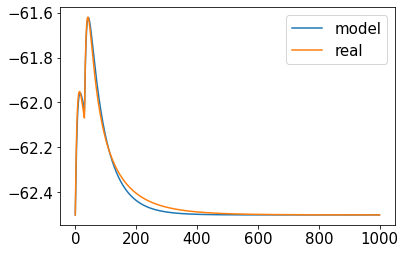

In [49]:
y = model(X, K)
plt.plot(y-62.5, label='model')
plt.plot(v7, label='real')
plt.legend()

# Dual-input Sampling

In [31]:
tr_num = 10
test_num = 10
time_dur = 1000
tr_ip = []
tr_op = np.empty((tr_num, time_dur + 1))
test_ip = []
test_op = np.empty((test_num, time_dur + 1))

for i in range(tr_num):
    #interval = np.random.randint(70, 130)
    for j in range(len(input_list)):
        ns_list[j].start = 0
        ns_list[j].number = 30
        ns_list[j].interval = 50
        ns_list[j].noise = 1
        nc_list[j].delay = 0
    for j in range(len(input_list)):
        syn_list[j].tau = 7
        syn_list[j].e = 0
        if j == 0 or j == 1:
            nc_list[j].weight[0] = 0.00005
        else:
            nc_list[j].weight[0] = 0.0000
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(h.soma(0.5)._ref_v)
    tvec0 = h.Vector()
    tvec1 = h.Vector()
    nc0.record(tvec0)
    nc1.record(tvec1)
    h.finitialize(-62.5)
    h.continuerun(time_dur)
    tr_ip.append(np.round(np.array(tvec0), decimals=0))
    tr_ip.append(np.round(np.array(tvec1), decimals=0))
    tr_op[i] = np.array(v)[::10]
    if i % 10 == 0:
        print(i)

print('---------------')
print('test begin')
for i in range(test_num):
    #interval = np.random.randint(70, 130)
    for j in range(len(input_list)):
        ns_list[j].start = 0
        ns_list[j].number = 30
        ns_list[j].interval = 50
        ns_list[j].noise = 1
        nc_list[j].delay = 0
    for j in range(len(input_list)):
        syn_list[j].tau = 7
        syn_list[j].e = 0
        if j == 0 or j == 1:
            nc_list[j].weight[0] = 0.00005
        else:
            nc_list[j].weight[0] = 0.0000
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(h.soma(0.5)._ref_v)
    tvec0 = h.Vector()
    tvec1 = h.Vector()
    nc0.record(tvec0)
    nc1.record(tvec1)
    h.finitialize(-62.5)
    h.continuerun(time_dur)
    test_ip.append(np.round(np.array(tvec0), decimals=0))
    test_ip.append(np.round(np.array(tvec1), decimals=0))
    test_op[i] = np.array(v)[::10]
    if i % 10 == 0:
        print(i)

with open('data/training_set_ip_passive_dual_10.p', 'wb') as f:
    pickle.dump(tr_ip, f)
with open('data/training_set_op_passive_dual_10.p', 'wb') as f:
    pickle.dump(tr_op, f) 
with open('data/testing_set_ip_passive_dual_10.p', 'wb') as f:
    pickle.dump(test_ip, f)
with open('data/testing_set_op_passive_dual_10.p', 'wb') as f:
    pickle.dump(test_op, f)

0
---------------
test begin
0


# Vsep sampling

In [12]:
time_dur = 200
Vsep = np.zeros((9, time_dur+1))
for i in range(len(input_list)):
    ns_list[i].start = 0
    ns_list[i].number = 1
    ns_list[i].interval = 50
    ns_list[i].noise = 0
    nc_list[i].delay = 0
for j in range(9):
    for i in range(len(input_list)):
        if i == j:
            nc_list[i].weight[0] = 0.00005
        else:
            nc_list[i].weight[0] = 0.00000
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(h.soma(0.5)._ref_v)
    h.finitialize(-62.5)
    h.continuerun(time_dur)
    Vsep[j] = np.array(v)[::10]

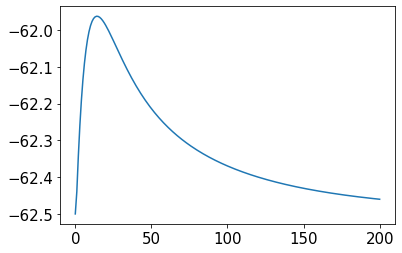

In [13]:
plt.plot(Vsep[6])

In [16]:
with open('data/Vsep_active.p', 'wb') as f:
    pickle.dump(Vsep, f)

# Sampling(passive)

In [17]:
tr_num = 5
test_num = 5
time_dur = 160000
tr_ip = []
tr_op = np.empty((tr_num, time_dur + 1))



# E
for j in range(len(input_list)):
    ns_list[j].start = 0
    ns_list[j].number = 6400
    ns_list[j].interval = 50
    ns_list[j].noise = 1
    nc_list[j].delay = 0
    syn_list[j].e = 0
    syn_list[j].tau = 7
    if j < 4:
        nc_list[j].weight[0] = 0.00002
    else:
        nc_list[j].weight[0] = 0.00002
    
# # EI
# for i in range(len(input_list)):
#     ns_list[i].start = 0
#     ns_list[i].number = 1500
#     ns_list[i].interval = 2
#     ns_list[i].noise = 1
#     nc_list[i].delay = 0

# for i in range(len(syne_list)):
#     syne_list[i].tau = 3
#     syne_list[i].e = 100

# for i in range(len(syni_list)):
#     syni_list[i].tau = 3
#     syni_list[i].e = -80

# for i in range(len(nce_list)):
#     nce_list[i].weight[0] = 0.00002
# for i in range(len(nci_list)):
#     nci_list[i].weight[0] = 0.0001

for i in range(tr_num):
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(h.soma(0.5)._ref_v)
    tvec0 = h.Vector()
    tvec1 = h.Vector()
    tvec2 = h.Vector()
    tvec3 = h.Vector()
    tvec4 = h.Vector()
    tvec5 = h.Vector()
    tvec6 = h.Vector()
    tvec7 = h.Vector()
    tvec8 = h.Vector()
    nc0.record(tvec0)
    nc1.record(tvec1)
    nc2.record(tvec2)
    nc3.record(tvec3)
    nc4.record(tvec4)
    nc5.record(tvec5)
    nc6.record(tvec6)
    nc7.record(tvec7)
    nc8.record(tvec8)
    h.finitialize(-62.5)
    h.continuerun(time_dur)
    tr_ip.append(np.round(np.array(tvec0), decimals=0))
    tr_ip.append(np.round(np.array(tvec1), decimals=0))
    tr_ip.append(np.round(np.array(tvec2), decimals=0))
    tr_ip.append(np.round(np.array(tvec3), decimals=0))
    tr_ip.append(np.round(np.array(tvec4), decimals=0))
    tr_ip.append(np.round(np.array(tvec5), decimals=0))
    tr_ip.append(np.round(np.array(tvec6), decimals=0))
    tr_ip.append(np.round(np.array(tvec7), decimals=0))
    tr_ip.append(np.round(np.array(tvec8), decimals=0))
    tr_op[i] = np.array(v)[::10]
    # if i % 10 == 0:
    print(i)

print('---------------')
print('test begin')

time_dur = 640000
test_ip = []
test_op = np.empty((test_num, time_dur + 1))

# E
for j in range(len(input_list)):
    ns_list[j].start = 0
    ns_list[j].number = 25600
    ns_list[j].interval = 50
    ns_list[j].noise = 1
    nc_list[j].delay = 0
    syn_list[j].e = 0
    syn_list[j].tau = 7
    if j < 4:
        nc_list[j].weight[0] = 0.00002
    else:
        nc_list[j].weight[0] = 0.00002

# # EI
# for i in range(len(input_list)):
#     ns_list[i].start = 0
#     ns_list[i].number = 1500
#     ns_list[i].interval = 2
#     ns_list[i].noise = 1
#     nc_list[i].delay = 0

# for i in range(len(syne_list)):
#     syne_list[i].tau = 3
#     syne_list[i].e = 100

# for i in range(len(syni_list)):
#     syni_list[i].tau = 3
#     syni_list[i].e = -80

# for i in range(len(nce_list)):
#     nce_list[i].weight[0] = 0.00002
# for i in range(len(nci_list)):
#     nci_list[i].weight[0] = 0.0001

for i in range(test_num):
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(h.soma(0.5)._ref_v)
    tvec0 = h.Vector()
    tvec1 = h.Vector()
    tvec2 = h.Vector()
    tvec3 = h.Vector()
    tvec4 = h.Vector()
    tvec5 = h.Vector()
    tvec6 = h.Vector()
    tvec7 = h.Vector()
    tvec8 = h.Vector()
    nc0.record(tvec0)
    nc1.record(tvec1)
    nc2.record(tvec2)
    nc3.record(tvec3)
    nc4.record(tvec4)
    nc5.record(tvec5)
    nc6.record(tvec6)
    nc7.record(tvec7)
    nc8.record(tvec8)
    h.finitialize(-62.5)
    h.continuerun(time_dur)
    test_ip.append(np.round(np.array(tvec0), decimals=0))
    test_ip.append(np.round(np.array(tvec1), decimals=0))
    test_ip.append(np.round(np.array(tvec2), decimals=0))
    test_ip.append(np.round(np.array(tvec3), decimals=0))
    test_ip.append(np.round(np.array(tvec4), decimals=0))
    test_ip.append(np.round(np.array(tvec5), decimals=0))
    test_ip.append(np.round(np.array(tvec6), decimals=0))
    test_ip.append(np.round(np.array(tvec7), decimals=0))
    test_ip.append(np.round(np.array(tvec8), decimals=0))
    test_op[i] = np.array(v)[::10]
    # if i % 10 == 0:
    print(i)

with open('/home/mjy/project/bilinear_network/data/testing_set_ip_temp_160s.p', 'wb') as f:
    pickle.dump(tr_ip, f)
with open('/home/mjy/project/bilinear_network/data/testing_set_op_temp_160s.p', 'wb') as f:
    pickle.dump(tr_op, f) 
with open('/home/mjy/project/bilinear_network/data/testing_set_ip_temp_640s.p', 'wb') as f:
    pickle.dump(test_ip, f)
with open('/home/mjy/project/bilinear_network/data/testing_set_op_temp_640s.p', 'wb') as f:
    pickle.dump(test_op, f)

0
1
2
3
4
---------------
test begin
0
1
2
3
4


(5, 160001)


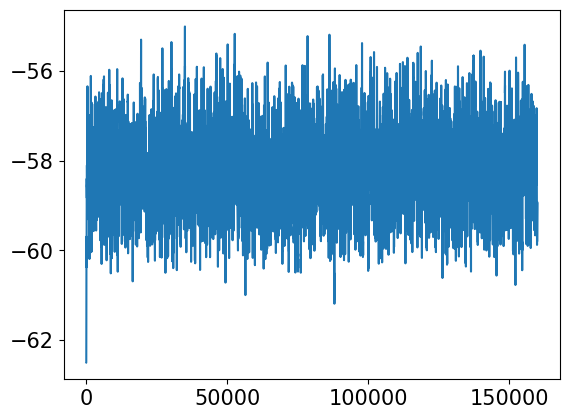

In [18]:
print(tr_op.shape)
plt.plot(tr_op[0])

(5, 640001)


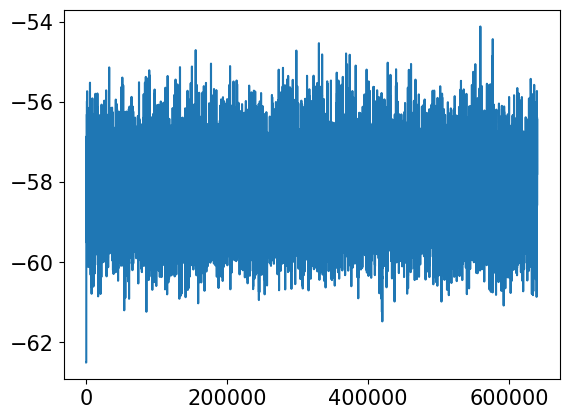

In [19]:
print(test_op.shape)
plt.plot(test_op[0])

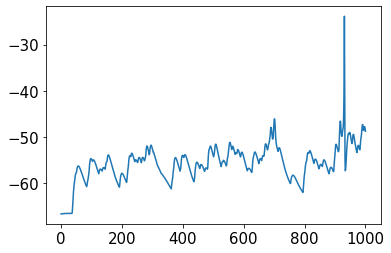

In [160]:
plt.plot(tr_op[10])

# Sampling(active)

In [36]:
tr_num = 10
test_num = 10
time_dur = 2000
tr_ip = []
tr_spike_time = []
#tr_op = np.empty((tr_num, time_dur*5 + 1))
tr_op = np.empty((tr_num, time_dur + 1))
test_ip = []
test_spike_time = []
#test_op = np.empty((test_num, time_dur*5 + 1))
test_op = np.empty((test_num, time_dur + 1))

for j in range(len(input_list)):
    ns_list[j].start = 0
    ns_list[j].number = 300
    ns_list[j].interval = 10
    ns_list[j].noise = 1
    nc_list[j].delay = 000
for j in range(len(input_list)):
    syn_list[j].tau = 7
    syn_list[j].e = 100
    nc_list[j].weight[0] = 0.001
# for i in range(len(input_list)):
#     ns_list[i].start = 0
#     ns_list[i].number = 30
#     ns_list[i].interval = 50
#     ns_list[i].noise = 1
#     nc_list[i].delay = 1000
# for i in range(len(syne_list)):
#     syne_list[i].tau = 7
#     syne_list[i].e = 0
# for i in range(len(syni_list)):
#     syni_list[i].tau = 7
#     syni_list[i].e = -70
# for i in range(len(nce_list)):
#     nce_list[i].weight[0] = 0.00003
# for i in range(len(nci_list)):
#     nci_list[i].weight[0] = 0.0001

for i in range(tr_num):
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(h.soma(0.5)._ref_v)
    spike_vec = h.Vector()
    netcon = h.NetCon(h.soma(0.5)._ref_v, None)
    netcon.record(spike_vec)
    tvec0 = h.Vector()
    tvec1 = h.Vector()
    tvec2 = h.Vector()
    tvec3 = h.Vector()
    tvec4 = h.Vector()
    tvec5 = h.Vector()
    tvec6 = h.Vector()
    tvec7 = h.Vector()
    tvec8 = h.Vector()
    nc0.record(tvec0)
    nc1.record(tvec1)
    nc2.record(tvec2)
    nc3.record(tvec3)
    nc4.record(tvec4)
    nc5.record(tvec5)
    nc6.record(tvec6)
    nc7.record(tvec7)
    nc8.record(tvec8)
    h.finitialize(-67.26)
    h.continuerun(time_dur)
    tr_ip.append(np.round(np.array(tvec0), decimals=0))
    tr_ip.append(np.round(np.array(tvec1), decimals=0))
    tr_ip.append(np.round(np.array(tvec2), decimals=0))
    tr_ip.append(np.round(np.array(tvec3), decimals=0))
    tr_ip.append(np.round(np.array(tvec4), decimals=0))
    tr_ip.append(np.round(np.array(tvec5), decimals=0))
    tr_ip.append(np.round(np.array(tvec6), decimals=0))
    tr_ip.append(np.round(np.array(tvec7), decimals=0))
    tr_ip.append(np.round(np.array(tvec8), decimals=0))
    tr_spike_time.append(np.round(np.array(spike_vec), decimals=0))
    #tr_op[i] = np.array(v)[10000:40010:2]
    tr_op[i] = np.array(v)[::10]
    if i % 10 == 0:
        print(i)

print('---------------')
print('test begin')

for j in range(len(input_list)):
    ns_list[j].start = 0
    ns_list[j].number = 300
    ns_list[j].interval = 10
    ns_list[j].noise = 1
    nc_list[j].delay = 000
for j in range(len(input_list)):
    syn_list[j].tau = 7
    syn_list[j].e = 100
    nc_list[j].weight[0] = 0.001

# for i in range(len(input_list)):
#     ns_list[i].start = 0
#     ns_list[i].number = 30
#     ns_list[i].interval = 50
#     ns_list[i].noise = 1
#     nc_list[i].delay = 1000
# for i in range(len(syne_list)):
#     syne_list[i].tau = 7
#     syne_list[i].e = 0
# for i in range(len(syni_list)):
#     syni_list[i].tau = 7
#     syni_list[i].e = -70
# for i in range(len(nce_list)):
#     nce_list[i].weight[0] = 0.00003
# for i in range(len(nci_list)):
#     nci_list[i].weight[0] = 0.0001

for i in range(test_num):
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(h.soma(0.5)._ref_v)
    spike_vec = h.Vector()
    netcon = h.NetCon(h.soma(0.5)._ref_v, None)
    netcon.record(spike_vec)
    tvec0 = h.Vector()
    tvec1 = h.Vector()
    tvec2 = h.Vector()
    tvec3 = h.Vector()
    tvec4 = h.Vector()
    tvec5 = h.Vector()
    tvec6 = h.Vector()
    tvec7 = h.Vector()
    tvec8 = h.Vector()
    nc0.record(tvec0)
    nc1.record(tvec1)
    nc2.record(tvec2)
    nc3.record(tvec3)
    nc4.record(tvec4)
    nc5.record(tvec5)
    nc6.record(tvec6)
    nc7.record(tvec7)
    nc8.record(tvec8)
    h.finitialize(-67.26)
    #h.continuerun(1000+time_dur)
    h.continuerun(time_dur)
    test_ip.append(np.round(np.array(tvec0), decimals=0))
    test_ip.append(np.round(np.array(tvec1), decimals=0))
    test_ip.append(np.round(np.array(tvec2), decimals=0))
    test_ip.append(np.round(np.array(tvec3), decimals=0))
    test_ip.append(np.round(np.array(tvec4), decimals=0))
    test_ip.append(np.round(np.array(tvec5), decimals=0))
    test_ip.append(np.round(np.array(tvec6), decimals=0))
    test_ip.append(np.round(np.array(tvec7), decimals=0))
    test_ip.append(np.round(np.array(tvec8), decimals=0))
    test_spike_time.append(np.round(np.array(spike_vec), decimals=0))
    #test_op[i] = np.array(v)[10000:40010:2]
    test_op[i] = np.array(v)[::10]
    if i % 10 == 0:
        print(i)

with open('data/training_set_ip_temp_active_Neuron2018.p', 'wb') as f:
    pickle.dump(tr_ip, f)
with open('data/training_set_op_temp_active_Neuron2018.p', 'wb') as f:
    pickle.dump(tr_op, f) 
with open('data/testing_set_ip_temp_active_Neuron2018.p', 'wb') as f:
    pickle.dump(test_ip, f)
with open('data/testing_set_op_temp_active_Neuron2018.p', 'wb') as f:
    pickle.dump(test_op, f)
# with open('data/training_spike_time_10Hz_active_spike_highth_5Hz.p', 'wb') as f:
#     pickle.dump(tr_spike_time, f)
# with open('data/testing_spike_time_10Hz_active_spike_highth_5Hz.p', 'wb') as f:
#     pickle.dump(test_spike_time, f)

0
---------------
test begin
0


In [35]:
tr_spike_time[4]

array([ 202.,  576.,  700.,  789., 1070., 1221., 1319., 2328., 2976.])

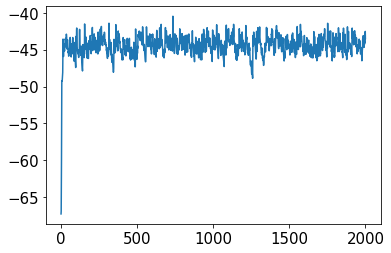

In [37]:
plt.plot(tr_op[4])

In [88]:
np.max(tr_op)

-53.65948322849977

In [89]:
len(tr_op[0])

1001

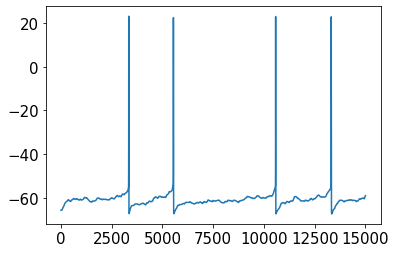

In [66]:
plt.plot(tr_op[0])
#plt.axvline(x = 1960)

In [68]:
tr_spike_time[0] * 5

array([ 3335.,  5535., 10575., 13315.])

In [67]:
tr_ip[0]

array([  40.,   95.,  140.,  364.,  410.,  429.,  434.,  442.,  594.,
        645.,  684.,  835.,  868.,  919.,  925.,  949.,  958.,  972.,
       1029., 1033., 1073., 1083., 1216., 1224., 1262., 1442., 1515.,
       1614., 1855., 1920., 1924., 1939., 2076., 2092., 2099., 2162.,
       2261., 2371., 2594., 2605., 2616., 2698., 2713., 2725., 2726.,
       2835., 2891., 2912., 2922., 2989., 2992., 3028., 3141., 3215.,
       3328., 3617., 3619., 3625., 3645., 3682., 3721., 3775., 3904.,
       3981.])

In [50]:
np.array(tvec8)

array([ 50.,  60.,  70.,  80.,  90., 100., 110., 120., 130., 140.])

In [33]:
def biexponential(x, tau_rise, tau_decay):
    return (1 - np.exp(-x / tau_rise)) * np.exp(-x / tau_decay)

In [31]:
def alpha(x, tau):
    return (x / tau) * np.exp(-x / tau)

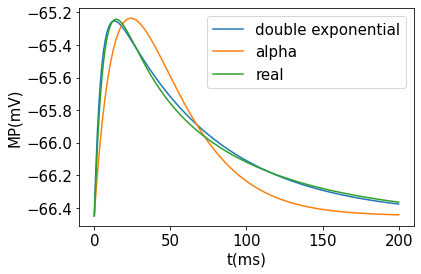

In [57]:
x = np.linspace(0, 200, 201)
t = np.linspace(0, 200, 501)
y1 = 1.58 * biexponential(x, 5, 65) - 66.45
# y2 = 1 * biexponential(x, 4, 50) - 66.45
y2 = 3.3 * alpha(x, 24) - 66.45
plt.plot(y1, label='double exponential')
plt.plot(y2, label='alpha')
# plt.plot(t, (v8+62.5)*0.25-62.5, label='NMDA real')
# plt.plot(t, (v9+62.5)*0.4-62.5, label='AMPA real')
plt.plot(v9, label='real')
plt.legend()
plt.xlabel('t(ms)')
plt.ylabel('MP(mV)')
plt.savefig('figure/kernel_compare_active_highth',bbox_inches='tight')

# Sampling(different duration active)

In [17]:
num = 10
time_dur = 5000
tr_5_ip = []
# tr_5_spike_time = []
tr_5_op = np.empty((num, time_dur + 1))

for j in range(len(input_list)):
    ns_list[j].start = 0
    ns_list[j].number = 200
    ns_list[j].interval = 50
    ns_list[j].noise = 1
    nc_list[j].delay = 000
for j in range(len(input_list)):
    syn_list[j].tau = 7
    syn_list[j].e = 0
    nc_list[j].weight[0] = 0.0003

for i in range(num):
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(h.soma(0.5)._ref_v)
    # spike_vec = h.Vector()
    # netcon = h.NetCon(h.soma(0.5)._ref_v, None)
    # netcon.record(spike_vec)
    tvec0 = h.Vector()
    tvec1 = h.Vector()
    tvec2 = h.Vector()
    tvec3 = h.Vector()
    tvec4 = h.Vector()
    tvec5 = h.Vector()
    tvec6 = h.Vector()
    tvec7 = h.Vector()
    tvec8 = h.Vector()
    nc0.record(tvec0)
    nc1.record(tvec1)
    nc2.record(tvec2)
    nc3.record(tvec3)
    nc4.record(tvec4)
    nc5.record(tvec5)
    nc6.record(tvec6)
    nc7.record(tvec7)
    nc8.record(tvec8)
    h.finitialize(-67.26)
    h.continuerun(time_dur)
    tr_5_ip.append(np.round(np.array(tvec0), decimals=0))
    tr_5_ip.append(np.round(np.array(tvec1), decimals=0))
    tr_5_ip.append(np.round(np.array(tvec2), decimals=0))
    tr_5_ip.append(np.round(np.array(tvec3), decimals=0))
    tr_5_ip.append(np.round(np.array(tvec4), decimals=0))
    tr_5_ip.append(np.round(np.array(tvec5), decimals=0))
    tr_5_ip.append(np.round(np.array(tvec6), decimals=0))
    tr_5_ip.append(np.round(np.array(tvec7), decimals=0))
    tr_5_ip.append(np.round(np.array(tvec8), decimals=0))
    # tr_5_spike_time.append(np.round(np.array(spike_vec), decimals=0))
    tr_5_op[i] = np.array(v)[::10]
    # if i % 10 == 0:
    print(i)

print('---------------')
print('5s end')
with open('/home/mjy/project/bilinear_network/data/training_set_ip_5s_active.p', 'wb') as f:
    pickle.dump(tr_5_ip, f)
with open('/home/mjy/project/bilinear_network/data/training_set_op_5s_active.p', 'wb') as f:
    pickle.dump(tr_5_op, f)

#------------------------------------------------------------------------------------------------------------------
num = 2
time_dur = 5000*2
tr_10_ip = []
# tr_5_spike_time = []
tr_10_op = np.empty((num, time_dur + 1))

for j in range(len(input_list)):
    ns_list[j].start = 0
    ns_list[j].number = 200*2
    ns_list[j].interval = 50
    ns_list[j].noise = 1
    nc_list[j].delay = 000
for j in range(len(input_list)):
    syn_list[j].tau = 7
    syn_list[j].e = 0
    nc_list[j].weight[0] = 0.0003

for i in range(num):
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(h.soma(0.5)._ref_v)
    # spike_vec = h.Vector()
    # netcon = h.NetCon(h.soma(0.5)._ref_v, None)
    # netcon.record(spike_vec)
    tvec0 = h.Vector()
    tvec1 = h.Vector()
    tvec2 = h.Vector()
    tvec3 = h.Vector()
    tvec4 = h.Vector()
    tvec5 = h.Vector()
    tvec6 = h.Vector()
    tvec7 = h.Vector()
    tvec8 = h.Vector()
    nc0.record(tvec0)
    nc1.record(tvec1)
    nc2.record(tvec2)
    nc3.record(tvec3)
    nc4.record(tvec4)
    nc5.record(tvec5)
    nc6.record(tvec6)
    nc7.record(tvec7)
    nc8.record(tvec8)
    h.finitialize(-67.26)
    h.continuerun(time_dur)
    tr_10_ip.append(np.round(np.array(tvec0), decimals=0))
    tr_10_ip.append(np.round(np.array(tvec1), decimals=0))
    tr_10_ip.append(np.round(np.array(tvec2), decimals=0))
    tr_10_ip.append(np.round(np.array(tvec3), decimals=0))
    tr_10_ip.append(np.round(np.array(tvec4), decimals=0))
    tr_10_ip.append(np.round(np.array(tvec5), decimals=0))
    tr_10_ip.append(np.round(np.array(tvec6), decimals=0))
    tr_10_ip.append(np.round(np.array(tvec7), decimals=0))
    tr_10_ip.append(np.round(np.array(tvec8), decimals=0))
    # tr_5_spike_time.append(np.round(np.array(spike_vec), decimals=0))
    tr_10_op[i] = np.array(v)[::10]
    # if i % 10 == 0:
    print(i)

print('---------------')
print('10s end')
with open('/home/mjy/project/bilinear_network/data/training_set_ip_10s_active.p', 'wb') as f:
    pickle.dump(tr_10_ip, f)
with open('/home/mjy/project/bilinear_network/data/training_set_op_10s_active.p', 'wb') as f:
    pickle.dump(tr_10_op, f)

#------------------------------------------------------------------------------------------------------------------

num = 2
time_dur = 5000*4
tr_20_ip = []
# tr_5_spike_time = []
tr_20_op = np.empty((num, time_dur + 1))

for j in range(len(input_list)):
    ns_list[j].start = 0
    ns_list[j].number = 200*4
    ns_list[j].interval = 50
    ns_list[j].noise = 1
    nc_list[j].delay = 000
for j in range(len(input_list)):
    syn_list[j].tau = 7
    syn_list[j].e = 0
    nc_list[j].weight[0] = 0.0003

for i in range(num):
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(h.soma(0.5)._ref_v)
    # spike_vec = h.Vector()
    # netcon = h.NetCon(h.soma(0.5)._ref_v, None)
    # netcon.record(spike_vec)
    tvec0 = h.Vector()
    tvec1 = h.Vector()
    tvec2 = h.Vector()
    tvec3 = h.Vector()
    tvec4 = h.Vector()
    tvec5 = h.Vector()
    tvec6 = h.Vector()
    tvec7 = h.Vector()
    tvec8 = h.Vector()
    nc0.record(tvec0)
    nc1.record(tvec1)
    nc2.record(tvec2)
    nc3.record(tvec3)
    nc4.record(tvec4)
    nc5.record(tvec5)
    nc6.record(tvec6)
    nc7.record(tvec7)
    nc8.record(tvec8)
    h.finitialize(-67.26)
    h.continuerun(time_dur)
    tr_20_ip.append(np.round(np.array(tvec0), decimals=0))
    tr_20_ip.append(np.round(np.array(tvec1), decimals=0))
    tr_20_ip.append(np.round(np.array(tvec2), decimals=0))
    tr_20_ip.append(np.round(np.array(tvec3), decimals=0))
    tr_20_ip.append(np.round(np.array(tvec4), decimals=0))
    tr_20_ip.append(np.round(np.array(tvec5), decimals=0))
    tr_20_ip.append(np.round(np.array(tvec6), decimals=0))
    tr_20_ip.append(np.round(np.array(tvec7), decimals=0))
    tr_20_ip.append(np.round(np.array(tvec8), decimals=0))
    # tr_5_spike_time.append(np.round(np.array(spike_vec), decimals=0))
    tr_20_op[i] = np.array(v)[::10]
    # if i % 10 == 0:
    print(i)

print('---------------')
print('20s end')
with open('/home/mjy/project/bilinear_network/data/training_set_ip_20s_active.p', 'wb') as f:
    pickle.dump(tr_20_ip, f)
with open('/home/mjy/project/bilinear_network/data/training_set_op_20s_active.p', 'wb') as f:
    pickle.dump(tr_20_op, f)


#------------------------------------------------------------------------------------------------------------------

num = 2
time_dur = 5000*8
tr_40_ip = []
# tr_5_spike_time = []
tr_40_op = np.empty((num, time_dur + 1))

for j in range(len(input_list)):
    ns_list[j].start = 0
    ns_list[j].number = 200*8
    ns_list[j].interval = 50
    ns_list[j].noise = 1
    nc_list[j].delay = 000
for j in range(len(input_list)):
    syn_list[j].tau = 7
    syn_list[j].e = 0
    nc_list[j].weight[0] = 0.0003

for i in range(num):
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(h.soma(0.5)._ref_v)
    # spike_vec = h.Vector()
    # netcon = h.NetCon(h.soma(0.5)._ref_v, None)
    # netcon.record(spike_vec)
    tvec0 = h.Vector()
    tvec1 = h.Vector()
    tvec2 = h.Vector()
    tvec3 = h.Vector()
    tvec4 = h.Vector()
    tvec5 = h.Vector()
    tvec6 = h.Vector()
    tvec7 = h.Vector()
    tvec8 = h.Vector()
    nc0.record(tvec0)
    nc1.record(tvec1)
    nc2.record(tvec2)
    nc3.record(tvec3)
    nc4.record(tvec4)
    nc5.record(tvec5)
    nc6.record(tvec6)
    nc7.record(tvec7)
    nc8.record(tvec8)
    h.finitialize(-67.26)
    h.continuerun(time_dur)
    tr_40_ip.append(np.round(np.array(tvec0), decimals=0))
    tr_40_ip.append(np.round(np.array(tvec1), decimals=0))
    tr_40_ip.append(np.round(np.array(tvec2), decimals=0))
    tr_40_ip.append(np.round(np.array(tvec3), decimals=0))
    tr_40_ip.append(np.round(np.array(tvec4), decimals=0))
    tr_40_ip.append(np.round(np.array(tvec5), decimals=0))
    tr_40_ip.append(np.round(np.array(tvec6), decimals=0))
    tr_40_ip.append(np.round(np.array(tvec7), decimals=0))
    tr_40_ip.append(np.round(np.array(tvec8), decimals=0))
    # tr_5_spike_time.append(np.round(np.array(spike_vec), decimals=0))
    tr_40_op[i] = np.array(v)[::10]
    # if i % 10 == 0:
    print(i)

print('---------------')
print('40s end')
with open('/home/mjy/project/bilinear_network/data/training_set_ip_40s_active.p', 'wb') as f:
    pickle.dump(tr_40_ip, f)
with open('/home/mjy/project/bilinear_network/data/training_set_op_40s_active.p', 'wb') as f:
    pickle.dump(tr_40_op, f)


#------------------------------------------------------------------------------------------------------------------

num = 2
time_dur = 5000*16
tr_80_ip = []
# tr_5_spike_time = []
tr_80_op = np.empty((num, time_dur + 1))

for j in range(len(input_list)):
    ns_list[j].start = 0
    ns_list[j].number = 200*16
    ns_list[j].interval = 50
    ns_list[j].noise = 1
    nc_list[j].delay = 000
for j in range(len(input_list)):
    syn_list[j].tau = 7
    syn_list[j].e = 0
    nc_list[j].weight[0] = 0.0003

for i in range(num):
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(h.soma(0.5)._ref_v)
    # spike_vec = h.Vector()
    # netcon = h.NetCon(h.soma(0.5)._ref_v, None)
    # netcon.record(spike_vec)
    tvec0 = h.Vector()
    tvec1 = h.Vector()
    tvec2 = h.Vector()
    tvec3 = h.Vector()
    tvec4 = h.Vector()
    tvec5 = h.Vector()
    tvec6 = h.Vector()
    tvec7 = h.Vector()
    tvec8 = h.Vector()
    nc0.record(tvec0)
    nc1.record(tvec1)
    nc2.record(tvec2)
    nc3.record(tvec3)
    nc4.record(tvec4)
    nc5.record(tvec5)
    nc6.record(tvec6)
    nc7.record(tvec7)
    nc8.record(tvec8)
    h.finitialize(-67.26)
    h.continuerun(time_dur)
    tr_80_ip.append(np.round(np.array(tvec0), decimals=0))
    tr_80_ip.append(np.round(np.array(tvec1), decimals=0))
    tr_80_ip.append(np.round(np.array(tvec2), decimals=0))
    tr_80_ip.append(np.round(np.array(tvec3), decimals=0))
    tr_80_ip.append(np.round(np.array(tvec4), decimals=0))
    tr_80_ip.append(np.round(np.array(tvec5), decimals=0))
    tr_80_ip.append(np.round(np.array(tvec6), decimals=0))
    tr_80_ip.append(np.round(np.array(tvec7), decimals=0))
    tr_80_ip.append(np.round(np.array(tvec8), decimals=0))
    # tr_5_spike_time.append(np.round(np.array(spike_vec), decimals=0))
    tr_80_op[i] = np.array(v)[::10]
    # if i % 10 == 0:
    print(i)

print('---------------')
print('80s end')
with open('/home/mjy/project/bilinear_network/data/training_set_ip_80s_active.p', 'wb') as f:
    pickle.dump(tr_80_ip, f)
with open('/home/mjy/project/bilinear_network/data/training_set_op_80s_active.p', 'wb') as f:
    pickle.dump(tr_80_op, f)

#------------------------------------------------------------------------------------------------------------------

num = 2
time_dur = 5000*32
tr_160_ip = []
# tr_5_spike_time = []
tr_160_op = np.empty((num, time_dur + 1))

for j in range(len(input_list)):
    ns_list[j].start = 0
    ns_list[j].number = 200*32
    ns_list[j].interval = 50
    ns_list[j].noise = 1
    nc_list[j].delay = 000
for j in range(len(input_list)):
    syn_list[j].tau = 7
    syn_list[j].e = 0
    nc_list[j].weight[0] = 0.0003

for i in range(num):
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(h.soma(0.5)._ref_v)
    # spike_vec = h.Vector()
    # netcon = h.NetCon(h.soma(0.5)._ref_v, None)
    # netcon.record(spike_vec)
    tvec0 = h.Vector()
    tvec1 = h.Vector()
    tvec2 = h.Vector()
    tvec3 = h.Vector()
    tvec4 = h.Vector()
    tvec5 = h.Vector()
    tvec6 = h.Vector()
    tvec7 = h.Vector()
    tvec8 = h.Vector()
    nc0.record(tvec0)
    nc1.record(tvec1)
    nc2.record(tvec2)
    nc3.record(tvec3)
    nc4.record(tvec4)
    nc5.record(tvec5)
    nc6.record(tvec6)
    nc7.record(tvec7)
    nc8.record(tvec8)
    h.finitialize(-67.26)
    h.continuerun(time_dur)
    tr_160_ip.append(np.round(np.array(tvec0), decimals=0))
    tr_160_ip.append(np.round(np.array(tvec1), decimals=0))
    tr_160_ip.append(np.round(np.array(tvec2), decimals=0))
    tr_160_ip.append(np.round(np.array(tvec3), decimals=0))
    tr_160_ip.append(np.round(np.array(tvec4), decimals=0))
    tr_160_ip.append(np.round(np.array(tvec5), decimals=0))
    tr_160_ip.append(np.round(np.array(tvec6), decimals=0))
    tr_160_ip.append(np.round(np.array(tvec7), decimals=0))
    tr_160_ip.append(np.round(np.array(tvec8), decimals=0))
    # tr_5_spike_time.append(np.round(np.array(spike_vec), decimals=0))
    tr_160_op[i] = np.array(v)[::10]
    # if i % 10 == 0:
    print(i)

print('---------------')
print('160s end')
with open('/home/mjy/project/bilinear_network/data/training_set_ip_160s_active.p', 'wb') as f:
    pickle.dump(tr_160_ip, f)
with open('/home/mjy/project/bilinear_network/data/training_set_op_160s_active.p', 'wb') as f:
    pickle.dump(tr_160_op, f)

0
1
2
3
4
5
6
7
8
9
---------------
5s end
0
1
---------------
10s end
0
1
---------------
20s end
0
1
---------------
40s end
0
1
---------------
80s end
0
1
---------------
160s end


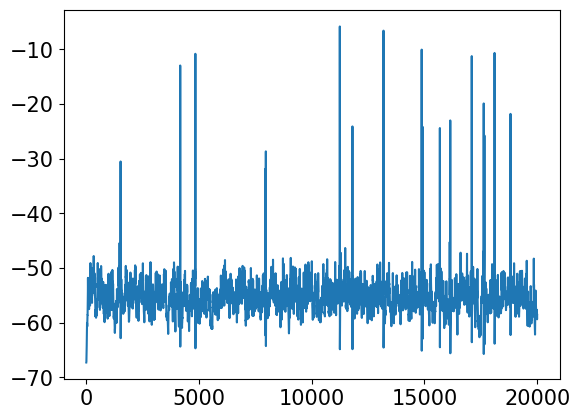

In [22]:
plt.plot(tr_20_op[0])

In [ ]:
with open('/home/mjy/project/bilinear_network/data/training_set_ip_5s_active.p', 'wb') as f:
    pickle.dump(tr_5_ip, f)
with open('/home/mjy/project/bilinear_network/data/training_set_op_5s_active.p', 'wb') as f:
    pickle.dump(tr_5_op, f)

FileNotFoundError: [Errno 2] No such file or directory: 'data/training_set_ip_5s_active.p'